### Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging 
logging.getLogger('tensorflow').setLevel(logging.ERROR)

neuron without activation = Regression/linear model

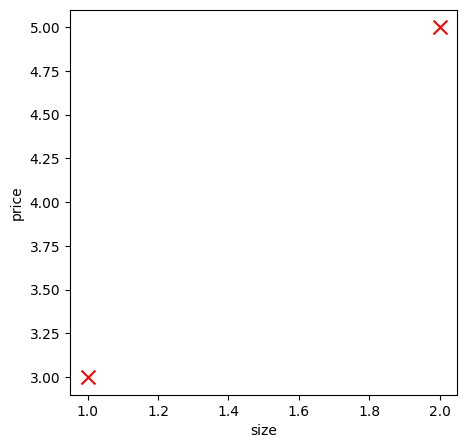

In [3]:
x_train = np.array([[1.0],[2.0]], dtype=np.float32)
y_train = np.array([[3.0],[5.0]], dtype=np.float32)

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(x_train, y_train, s=100, c='r', marker="x", label="data points")
ax.set_xlabel("size")
ax.set_ylabel("price")
plt.show()

In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `x_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [5]:
act1 = linear_layer(x_train[0].reshape(1,1)) # f(x_train[0])
print(act1)

tf.Tensor([[-0.02978635]], shape=(1, 1), dtype=float32)


2025-03-20 07:31:59.864880: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [8]:
w, b = linear_layer.get_weights()
print(f"w: {w}, b:{b}")

w: [[-0.02978635]], b:[0.]


A linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [21]:
set_w = np.array([[2.0]], dtype=np.float32)
set_b = np.array([1.0], dtype=np.float32)

# set weights take a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[2.]], dtype=float32), array([1.], dtype=float32)]


In [22]:
act1 = linear_layer(x_train[0].reshape(1,1)) # f(x_train[0])
a_linear = np.dot(set_w, x_train[0].reshape(1,1)) + set_b
print("act1: ", act1)
print("a_linear: ", a_linear)

act1:  tf.Tensor([[3.]], shape=(1, 1), dtype=float32)
a_linear:  [[3.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [23]:
pred_tf = linear_layer(x_train)
pred_np = np.dot(x_train, set_w) + set_b
print(pred_tf)
print(pred_np)

tf.Tensor(
[[3.]
 [5.]], shape=(2, 1), dtype=float32)
[[3.]
 [5.]]


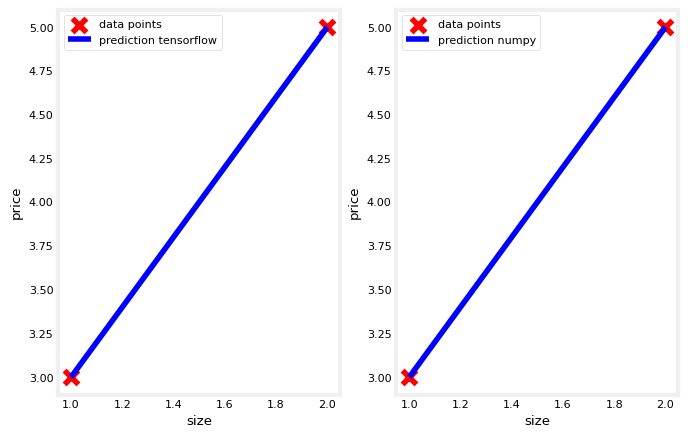

In [25]:
fig, ax = plt.subplots(1,2, figsize=(8,5))
ax[0].scatter(x_train, y_train, s=100, c='r', marker="x", label="data points")
ax[0].plot(x_train, pred_tf, c='b', label="prediction tensorflow")
ax[0].set_xlabel("size")
ax[0].set_ylabel("price")
ax[0].legend()

ax[1].scatter(x_train, y_train, s=100, c='r', marker="x", label="data points")
ax[1].plot(x_train, pred_np, c='b', label="prediction numpy")
ax[1].set_xlabel("size")
ax[1].set_ylabel("price")
ax[1].legend()
plt.show()

Neuron with sigmoid activation

In [27]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [28]:
pos = (Y_train == 1)
neg = (Y_train == 0)
X_train[pos]

array([3., 4., 5.], dtype=float32)

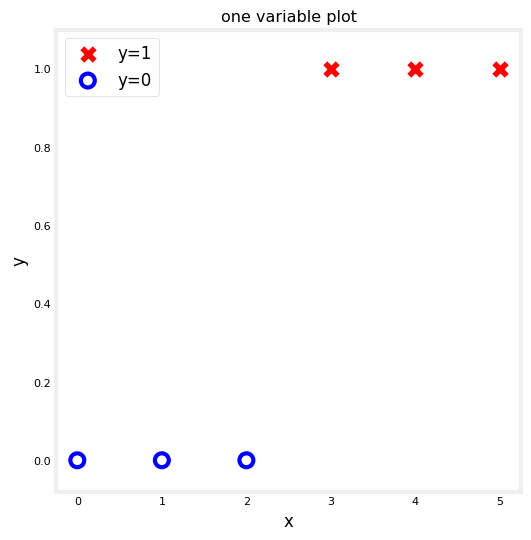

In [31]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors="blue",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [32]:
model = Sequential(
  [tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name="layer1")]
)

/home/balbir/pjct/self-py/self-py/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [34]:
logistic_layer = model.get_layer("layer1")
w, b = logistic_layer.get_weights()
print("Weights: {}".format(w))
print("Biases: {}".format(b))
print(w.shape, b.shape)

Weights: [[0.43]]
Biases: [0.]
(1, 1) (1,)


In [35]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [36]:
def sigmoid_np(z):
  return 1 / (1 + np.exp(-z))

In [37]:
act1 = model.predict(X_train[0].reshape(1,1))
print(act1)
act_log = sigmoid_np(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(act_log)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[0.01]]
[[0.01]]


### simple neural network

In [38]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [ ]:
X, Y = load_coffee_data()
print(X.shape, Y.shape) # X[0] is temperature, X[1] is duration

(200, 2) (200, 1)


Normalize the data

The procedure below uses a Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). It has the following steps:
- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.  
It is important to apply normalization to any future data that utilizes the learned model.

In [ ]:
print("pre normalization")
mx_t, mn_t = np.max(X[:,0]), np.min(X[:,0])
mx_d, mn_d = np.max(X[:,1]), np.min(X[:,1])
print("max temp: {}, min temp: {}".format(mx_t, mn_t))
print("max duration: {}, min duration: {}".format(mx_d, mn_d))
print("post normalization")

# keras normalization
norm_l = tf.keras.layers.Normalization(axis=-1) # axis=-1 means normalize each column
norm_l.adapt(X) # adapt the normalization layer to the data, learn mean and variance
Xn = norm_l(X) # apply the normalization layer to the data
print("post normalization")

mx_t, mn_t = np.max(Xn[:,0]), np.min(Xn[:,0])
mx_d, mn_d = np.max(Xn[:,1]), np.min(Xn[:,1])
print("max temp: {}, min temp: {}".format(mx_t, mn_t))
print("max duration: {}, min duration: {}".format(mx_d, mn_d))

pre normalization
max temp: 284.99434167453603, min temp: 151.32372212128612
max duration: 15.454206928801511, min duration: 11.512747082472469
post normalization
post normalization
max temp: 1.6597541570663452, min temp: -1.6852184534072876
max duration: 1.793238878250122, min duration: -1.6996712684631348


Tensorflow Model

In [41]:
tf.random.set_seed(1234)
model = Sequential(
  [tf.keras.Input(shape=(2,)),
   Dense(3, activation='sigmoid', name= 'layer1'),
   Dense(1, activation='sigmoid', name= 'layer2')
  ]
)

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
num_params_layer1 = 2*3 + 3 # W1 parameters + b1 parameters
num_params_layer2 = 3*1 + 1 # W2 parameters + b2 parameters
total_params = num_params_layer1 + num_params_layer2
print("Total number of parameters: {}".format(total_params))

Total number of parameters: 13


Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [46]:
W1, b1 = model.get_layer("layer1").get_weights()
print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(W1, b1)

W2, b2 = model.get_layer("layer2").get_weights()
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print(W2, b2)

W1 shape: (2, 3), b1 shape: (3,)
[[ 0.14  1.07  0.93]
 [ 0.16  0.01 -1.02]] [0. 0. 0.]
W2 shape: (3, 1), b2 shape: (1,)
[[ 0.08]
 [ 0.45]
 [-0.83]] [0.]


- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [52]:
model.compile(
  loss = tf.keras.losses.BinaryCrossentropy(),
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(Xn,Y, epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4875  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4813 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4765 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4718 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4672 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4626 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4579 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4532 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4486 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4441 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4397 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4354 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4313 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4273 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4235 
Epoch 16/100
7/7 ━━━━━━━━━━━━━

In the `compile` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.
The line `Epoch 1/10` describes which epoch model is currently running. 

For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. This means that the model will be trained on 32 samples at a time, and the weights will be updated after each batch. The `loss` value in each epoch is the average loss over all batches. Since we had 200 examples in our data set, thats account for ~7 batches with batch size 32.

updated weights after model finished training

In [53]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()

print(f"W1:\n {W1}\n\nb1:\n {b1}")
print(f"W2:\n {W2}\n\nb2:\n {b2}")

W1:
 [[2.88 3.52 5.27]
 [4.15 0.42 2.1 ]]

b1:
 [-0.87  3.05 -1.43]
W2:
 [[-3.81]
 [ 2.8 ]
 [-4.22]]

b2:
 [-1.08]


Test the model

The output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5. 

Let's start by creating input data. The model is expecting one or more examples where examples are in the rows of matrix. In this case, we have 2 features so the matrix will be (m,2) where m is the number of examples.
Recall, **we have normalized the input features so we must normalize our test data** as well.   
To make a prediction, you apply the `predict` method.

In [54]:
X_test = np.array(
  [[200, 13.9], # positive example 
  [200, 17]] # negative example
)
X_test_normalized = norm_l(X_test)
pred = model.predict(X_test_normalized)
print(f"predictions: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
predictions: [[0.4]
 [0. ]]


To convert the probabilities to a decision, we apply a threshold:

In [55]:
yhat = np.zeros_like(pred)
for i in range(len(pred)):
  if pred[i] >= 0.5:
    yhat[i] = 1
  else:
    yhat[i] = 0

print(f"yhat: {yhat}")

yhat: [[0.]
 [0.]]
